<a href="https://colab.research.google.com/github/gundasai/deeplearning/blob/master/pcb%20balanced%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
!pip install tensorflow==1.14.0

  Using cached https://files.pythonhosted.org/packages/de/f0/96fb2e0412ae9692dbf400e5b04432885f677ad6241c088ccc5fe7724d69/tensorflow-1.14.0-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/91/2d/2ed263449a078cd9c8a9ba50ebd50123adf1f8cfbea1492f9084169b89d9/tensorboard-1.14.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/3c/d5/21860a5b11caf0678fbc8319341b0ae21a07156911132e0e71bffed0510d/tensorflow_estimator-1.14.0-py2.py3-none-any.whl
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorflow 1.15.2
    Uninstalling tensorflow-1.15.2:
      Successfully uninstalled tensorflow-1.15.2


In [4]:
import os
os.chdir('/content/drive/My Drive/Balanced_PCB')
os.getcwd()

'/content/drive/My Drive/Balanced_PCB'

In [5]:
import numpy as np
a=np.load("xtrain.npy")
b=np.load("ytrain.npy")
print(a.shape)
print(b.shape)

(298, 300, 300, 3)
(298,)


In [0]:
from sklearn.utils import shuffle
(a,b)=shuffle(a,b)

In [0]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(a, b, test_size=0.33, random_state=42)

In [8]:
print(xtrain.shape)
print(ytrain.shape)

print(xtest.shape)
print(ytest.shape)

print(xtrain.ndim)
print(xtrain.dtype)

print(xtrain.ndim)
print(xtrain.dtype)

print(xtest.ndim)
print(xtest.dtype)

(199, 300, 300, 3)
(199,)
(99, 300, 300, 3)
(99,)
4
uint8
4
uint8
4
uint8


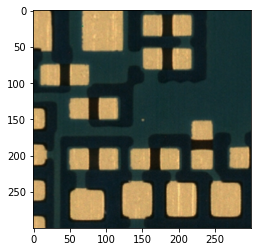

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(xtest[0], cmap='brg')

In [0]:
xtrain = xtrain.astype('float32')
xtest  = xtest.astype('float32')

In [11]:
print(xtrain.shape)
print(ytrain.shape)

(199, 300, 300, 3)
(199,)


In [12]:
#keras.utils.normalize(a, axis=-1, order=2)
print (np.max(xtrain),np.max(xtest))
print (np.min(xtrain),np.min(xtest))

print (np.max(ytrain),np.max(ytest))
print (np.min(ytrain),np.min(ytest))

mean = np.mean(xtrain)
std  = np.std(xtrain)

print(mean)
print(std)

xtrain -= mean
xtrain /= std

xtest -= mean
xtest /= std

print (np.max(xtrain),np.max(xtest))
print (np.min(xtrain),np.min(xtest))

255.0 255.0
0.0 0.0
1.0 1.0
0.0 0.0
52.966187
53.195366
3.7979589 3.7979589
-0.9956917 -0.9956917


In [13]:
from keras.utils import to_categorical
ytrain = to_categorical(ytrain)
ytest  =  to_categorical(ytest)
print(ytest[0])

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

[1. 0.]


In [14]:
print(xtrain.shape)
print(ytrain.shape)

(199, 300, 300, 3)
(199, 2)


In [15]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Activation
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import AveragePooling2D
from keras.layers import add
from keras.utils import plot_model
import keras

input1 = keras.layers.Input(shape=(300,300,3))

x1 = Conv2D(300,(3,3),strides=(2,2) ,activation='relu')(input1)
x2=keras.layers.BatchNormalization(axis = 3)(x1)
x3= Activation('relu')(x2)
x4= MaxPooling2D((3, 3), strides=(2, 2))(x3)

x5= Conv2D(400,(2,2),strides=(2,2) ,activation='relu')(x4)
x6=keras.layers.BatchNormalization(axis = 3)(x5)
x7= Activation('relu')(x6)
x8= MaxPooling2D((3, 3), strides=(2, 2))(x7)

x9= Conv2D(400,(2,2),strides=(1,1) ,activation='relu')(x8)
x10=keras.layers.BatchNormalization(axis = 3)(x9)
x11= Activation('relu')(x10)
x12= AveragePooling2D((7, 7), strides=(1, 1))(x11)


o=keras.layers.Flatten()(x12)








out = keras.layers.Dense(2000,activation="relu")(o)
out = keras.layers.Dense(1024,activation="relu")(out)
out = keras.layers.Dense(100,activation="relu")(out)
out1=keras.layers.Dense(2,activation="softmax")(out)

model = keras.models.Model(inputs=input1, outputs=out1)

model.summary()









Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 300, 300, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 149, 149, 300)     8400      
_________________________________________________________________
batch_normalization_1 (Batch (None, 149, 149, 300)     1200      
_________________________________________________________________
activation_1 (Activation)    (None, 149, 149, 300)     0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 300)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 400)       480400    
_________________________________________________________________
batch_normalization_2 (Batch (None, 37, 37, 400)   

In [0]:
def step_decay(epoch):
	initial_lrate = 0.1
	drop = 0.5
	epochs_drop = 10.0
	lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
	return lrate

In [17]:
print(xtrain.shape)
print(ytrain.shape)

(199, 300, 300, 3)
(199, 2)


In [23]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=['accuracy'])
#model.compile(optimizer='rmsprop', loss='categorical_crossentropy' ,metrics=['accuracy'])
history=model.fit(xtrain, ytrain,batch_size=20,epochs=10, verbose=1)

Epoch 1/10
199/199 [==============================] - 55s 278ms/step - loss: 0.0105 - acc: 1.0000
Epoch 2/10
199/199 [==============================] - 53s 269ms/step - loss: 0.0079 - acc: 1.0000
Epoch 3/10
199/199 [==============================] - 54s 270ms/step - loss: 0.0034 - acc: 1.0000
Epoch 4/10
199/199 [==============================] - 54s 270ms/step - loss: 0.0028 - acc: 1.0000
Epoch 5/10
199/199 [==============================] - 54s 271ms/step - loss: 0.0026 - acc: 1.0000
Epoch 6/10
199/199 [==============================] - 54s 271ms/step - loss: 0.0032 - acc: 1.0000
Epoch 7/10
199/199 [==============================] - 56s 280ms/step - loss: 0.0033 - acc: 1.0000
Epoch 8/10
199/199 [==============================] - 54s 271ms/step - loss: 0.0047 - acc: 1.0000
Epoch 9/10
199/199 [==============================] - 54s 273ms/step - loss: 0.0039 - acc: 1.0000
Epoch 10/10
199/199 [==============================] - 54s 271ms/step - loss: 0.0027 - acc: 1.0000


In [24]:
model.evaluate(xtest,ytest)

99/99 [==============================] - 8s 79ms/step


[0.465862360867587, 0.8585858591879257]

In [25]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(xtest)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['class 0', 'class 1']
print(classification_report(np.argmax(ytest,axis=1), y_pred,target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.89      0.82      0.85        50
     class 1       0.83      0.90      0.86        49

    accuracy                           0.86        99
   macro avg       0.86      0.86      0.86        99
weighted avg       0.86      0.86      0.86        99



In [21]:
model.evaluate(xtrain,ytrain)

199/199 [==============================] - 15s 76ms/step


[0.053342180186180616, 0.9748743721588173]

In [22]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(xtrain)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['class 0', 'class 1']
print(classification_report(np.argmax(ytrain,axis=1), y_pred,target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.98      0.97      0.97        99
     class 1       0.97      0.98      0.98       100

    accuracy                           0.97       199
   macro avg       0.97      0.97      0.97       199
weighted avg       0.97      0.97      0.97       199

